<a href="https://colab.research.google.com/github/adhishagc/bezier-curve-python/blob/master/Bezier_Curve_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

### **Manually plotting the Bezier curve using Divide and Conquer** 

In [0]:
def plot_lines():
  #Making points
  p0 = [0,0]
  p1 = [0.5,1]
  p2 = [0.75,1]
  p3 = [1,0]

  x=[p0[0],p1[0],p2[0],p3[0]]
  y=[p0[1],p1[1],p2[1],p3[1]]

  a=[(x[0]+x[1])/2,(x[1]+x[2])/2,(x[2]+x[3])/2]
  b=[(y[0]+y[1])/2,(y[1]+y[2])/2,(y[2]+y[3])/2]
  
  plt.plot(x,y, 'r+')
  plt.plot(x,y, linestyle='solid')
  plt.plot(a,b, linestyle='dashed')

In [0]:
def plot_manual_bezier():
  #Quadratic points
  p0 = [0,0.2]
  p1 = [0.3,0.8]
  p2 = [1,0.2]
  
  #mid points of P0P1
  midpoint_p01_x = (p0[0] + p1[0])/2
  midpoint_p01_y = (p0[1] + p1[1])/2
  midpoint_p01 =[midpoint_p01_x,midpoint_p01_y]

  #mid points of P1P2
  midpoint_p12_x = (p1[0] + p2[0])/2
  midpoint_p12_y = (p1[1] + p2[1])/2
  midpoint_p12 =[midpoint_p12_x,midpoint_p12_y]

  #MID point
  mid_x =(midpoint_p01_x + midpoint_p12_x)/2
  mid_y =(midpoint_p01_y + midpoint_p12_y)/2
  
  #Xpoints
  x_points=[]
  
  #t range
  t = [x for x in frange(0,1,0.01)]
  
  for item in t:
    val = ((1-item)**2)*p0[0]+2*item*(1-item)*p1[0]+(item**2)*p2[0]
    x_points.append(val)
    
  #Ypoints
  y_points=[]
  
  
  
  for item in t:
    val = ((1-item)**2)*p0[1]+2*item*(1-item)*p1[1]+(item**2)*p2[1]
    y_points.append(val)
  
  plt.plot([p0[0],p1[0],p2[0]],[p0[1],p1[1],p2[1]],'r+')
  plt.plot([midpoint_p01_x,midpoint_p12_x,mid_x],[midpoint_p01_y,midpoint_p12_y,mid_y],'r+')
  plt.plot([midpoint_p01_x,midpoint_p12_x,mid_x],[midpoint_p01_y,midpoint_p12_y,mid_y],linestyle='dashed')

  plt.plot([p0[0],p1[0],p2[0]],[p0[1],p1[1],p2[1]],linestyle='dashed')
  plt.plot(x_points,y_points)
  plt.show()
  

In [0]:
def frange(start, stop, step):
  i = start
  while i < stop:
    yield i
    i += step

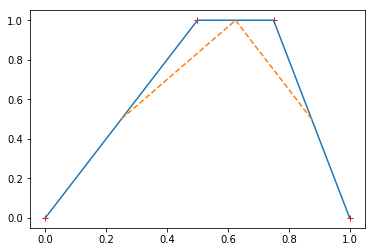

In [318]:
plot_lines()

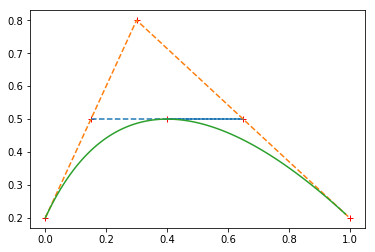

In [325]:
plot_manual_bezier()

In [0]:
#Generating Bernstein t function
def B(n,t):
  
  co_eff = np.empty([n+1])
  
  val_n_top = get_multiplied(n)
  
  for item in range(n+1):
    
    val_i = get_multiplied(item)
    val_n_i = get_multiplied(n-item)
    part_1 = val_n_top/(val_i*val_n_i)
    part_2 = t**(item)
    part_3 = (1-t)**(n-item)
    
    val = part_1 * part_2 * part_3
    
    co_eff[item] = val
  
  return co_eff

In [0]:
def B_range(n,x):
  val = np.empty(len(x))
  
  for i in range(len(x)):
    for col in range(n+1):
      val[i] = B(n,x[i])

In [0]:
def get_multiplied(n):
  total = 1
  
  if(n ==0):
    return total
  else:
    for i in range(1, n+1):
      total = total*i
  
  return total

In [0]:
def bernstein_plot(n):
  #create the major array
  major = np.empty([len(x),n+1])
  for i in range(len(x)):
    val = B(n,x[i])
    for graph in range(n+1):
      major[i][graph] = val[graph]
  
  major = pd.DataFrame(major)
  
  for i in range(n+1):
    plt.plot(x,major.iloc[:][i].values)

In [0]:
def random_bezier(n_points):
  #Create random n points 
  #x cords
  x_cords = [np.random.uniform(0,1) for _ in range(n_points)]

  #y cords
  y_cords = [np.random.uniform(0,1) for _ in range(n_points)]
  
  start = 0
  step = 0.01
  end = 1 + step
  t_range = [x for x in frange(start,end,step)]
  
  #generate bernstein coeffs
  x_cord_curve = np.empty([len(t_range)])
  y_cord_curve = np.empty([len(t_range)])
  
  for i in range(len(t_range)):
    val_x = 0
    val_y = 0
    for cord in range(n_points):
      val = B(n_points-1,t_range[i])
      val_x += val[cord]*x_cords[cord]
      val_y += val[cord]*y_cords[cord]

    x_cord_curve[i] = val_x
    y_cord_curve[i] = val_y
  
  plt.plot(x_cords,y_cords,linestyle='dashed')
  plt.plot(x_cords,y_cords, 'r+')
  plt.plot(x_cord_curve,y_cord_curve)

In [0]:
def random_bezier_3d(n_points):
  #Create random n points 
  #x cords
  x_cords = [np.random.uniform(0,1) for _ in range(n_points)]

  #y cords
  y_cords = [np.random.uniform(0,1) for _ in range(n_points)]
  
  #y cords
  z_cords = [np.random.uniform(0,1) for _ in range(n_points)]
  
  start = 0
  step = 0.01
  end = 1 + step
  t_range = [x for x in frange(start,end,step)]
  
  #generate bernstein coeffs
  x_cord_curve = np.empty([len(t_range)])
  y_cord_curve = np.empty([len(t_range)])
  z_cord_curve = np.empty([len(t_range)])
  
  for i in range(len(t_range)):
    val_x = 0
    val_y = 0
    val_z = 0
    for cord in range(n_points):
      val = B(n_points-1,t_range[i])
      val_x += val[cord]*x_cords[cord]
      val_y += val[cord]*y_cords[cord]
      val_z += val[cord]*z_cords[cord]

    x_cord_curve[i] = val_x
    y_cord_curve[i] = val_y
    z_cord_curve[i] = val_z
  
  #plt.plot(x_cords,y_cords,linestyle='dashed')
  #plt.plot(x_cords,y_cords, 'r+')
  #plt.plot(x_cord_curve,y_cord_curve)
  #plotting the function
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  #ax.scatter(x_cord_curve,y_cord_curve,z_cord_curve, label='Ackley Function')
  ax.plot(x_cords,y_cords,z_cords, 'r+')
  ax.plot(x_cord_curve,y_cord_curve,z_cord_curve, label='Ackley Function')

In [0]:
def random_bezier_patch(nx_points,ny_points):
  #Create random n points 
  #x cords
  x_cords = [x for x in frange(0,nx_points+0.01,0.01)]

  #y cords
  y_cords = [x for x in frange(0,ny_points+0.01,0.01)]
  
  
  start = 0
  step = 0.01
  end = 1 + step
  t_range = [x for x in frange(start,end,step)]
  
  #generate bernstein coeffs
  x_cord_curve = np.empty([len(t_range)])
  y_cord_curve = np.empty([len(t_range)])
  z_cord_curve = np.empty([len(t_range)])
  
  
  for i in range(len(t_range)):
    val_x = 0
    val_y = 0
    val_z = 0
    for cord_y in range(ny_points):
      val_other = B(ny_points-1,t_range[i])
      for cord_x in range(nx_points):
        val = B(nx_points-1,t_range[i])
        val_x += val[cord_x]*x_cords[cord_x]
        val_y += val[cord_x]*y_cords[cord_x]
        val_z += (val_x + val_y)*val_other[cord_y]

    x_cord_curve[i] = val_x
    y_cord_curve[i] = val_y
    z_cord_curve[i] = val_z
  
  #plt.plot(x_cords,y_cords,linestyle='dashed')
  #plt.plot(x_cords,y_cords, 'r+')
  #plt.plot(x_cord_curve,y_cord_curve)
  #plotting the function
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  #ax.scatter(x_cord_curve,y_cord_curve,z_cord_curve, label='Ackley Function')
  #ax.plot(x_cords,y_cords,z_cords, 'r+')
  ax.scatter(x_cord_curve,y_cord_curve,z_cord_curve, label='Ackley Function')

### **Generating Bernstein Plots** 

In [0]:
#Plot Bernstein
x = [x for x in frange(0,1+0.01,0.01)]

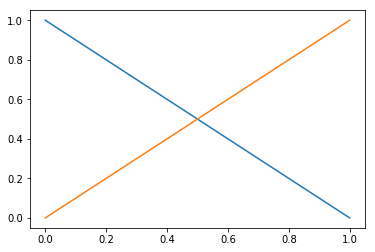

In [178]:
n = 1
bernstein_plot(n)


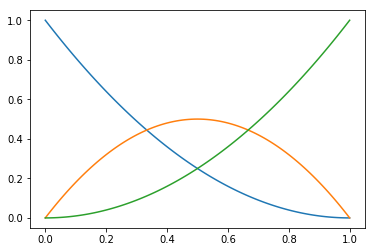

In [179]:
n = 2
bernstein_plot(n)

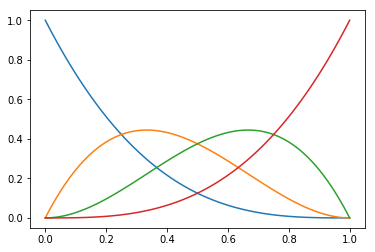

In [180]:
n = 3
bernstein_plot(n)

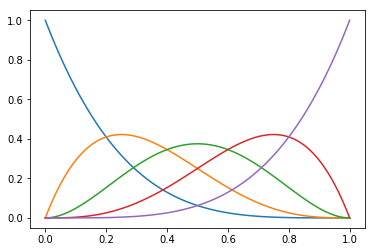

In [181]:
n = 4
bernstein_plot(n)

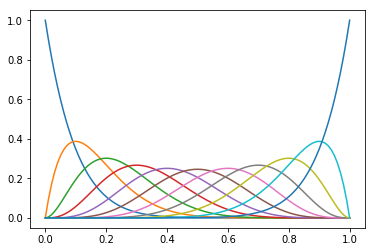

In [182]:
n = 10
bernstein_plot(n)

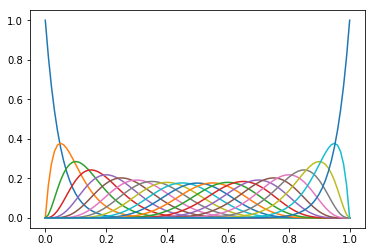

In [183]:
n = 20
bernstein_plot(n)

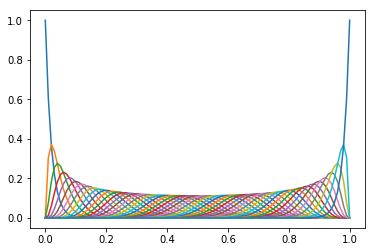

In [186]:
n = 50
bernstein_plot(n)

### **Generating Bezier Curves using Bernstein** 

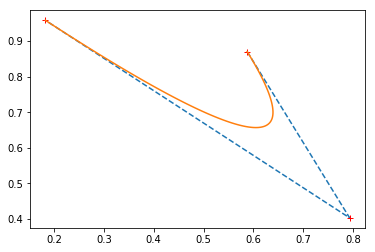

In [262]:
n_points = 3
random_bezier(n_points)

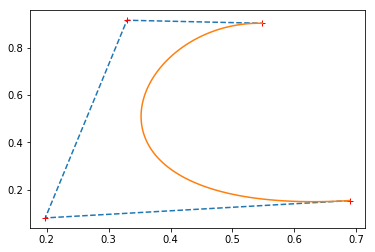

In [263]:
n_points = 4
random_bezier(n_points)

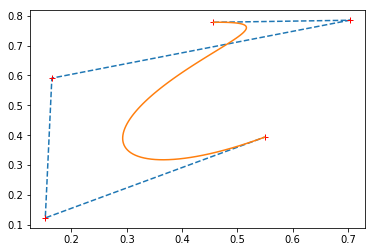

In [266]:
n_points = 5
random_bezier(n_points)

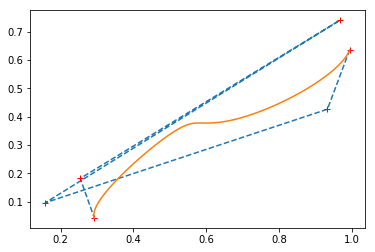

In [267]:
n_points = 6
random_bezier(n_points)

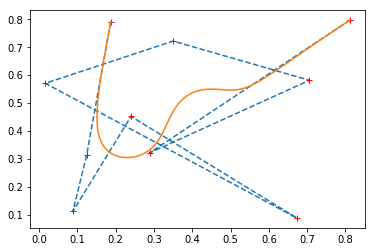

In [270]:
n_points = 10
random_bezier(n_points)

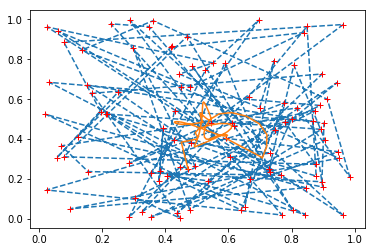

In [271]:
n_points = 100
random_bezier(n_points)

### **Bezier Patch** 

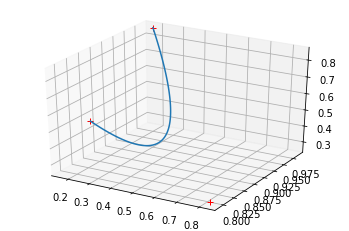

In [304]:
n_points = 3
random_bezier_3d(n_points)

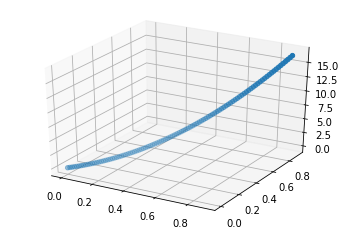

In [301]:
nx_points = 10
ny_points = 10
random_bezier_patch(nx_points,ny_points)